In [1]:
# Gerekli olan kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob 
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from PIL import Image 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import warnings
warnings.filterwarnings("ignore")


# Veri setinin çekimi

In [2]:
directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

classes = [i for i in os.listdir(directory) if '.' not  in i]
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

# Verilen kod parçası

In [3]:
label = []
path = []
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  
            if dir_name.split()[-1] != 'GT':          
                label.append(os.path.split(dir_name)[-1])  
                path.append(os.path.join(dir_name, filename)) 

data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

In [4]:
data 


,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [5]:
data.path [0]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png'

In [6]:
data.label.value_counts()


label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

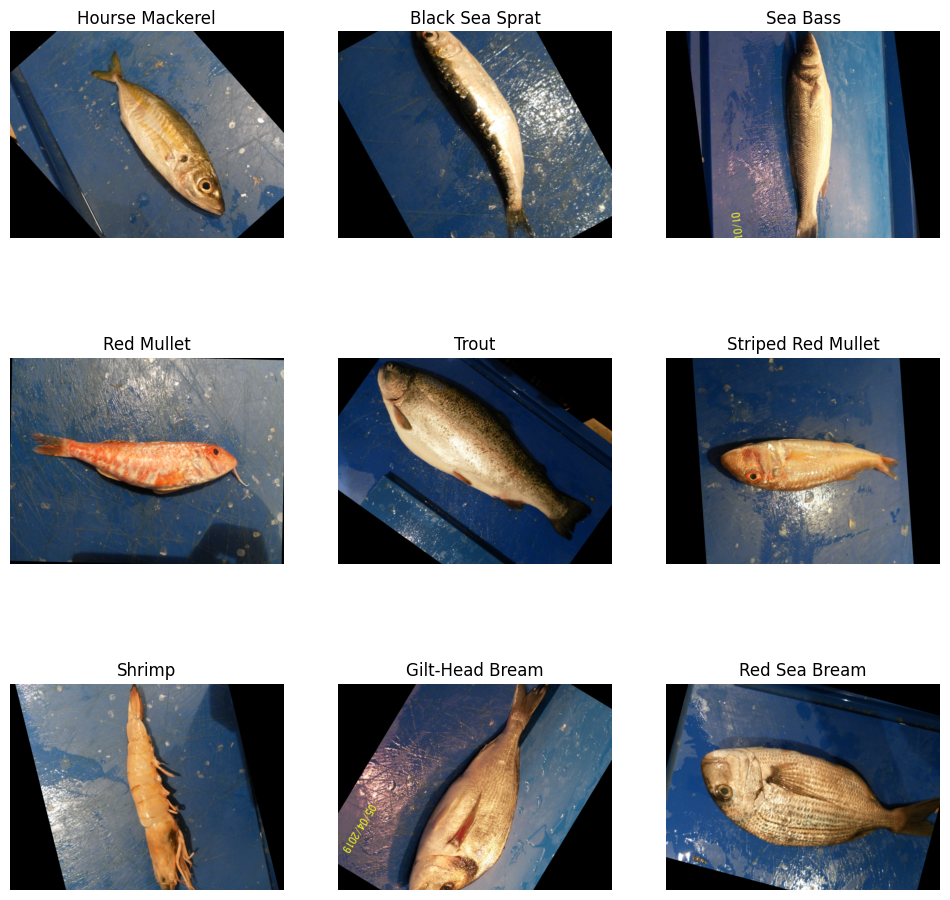

In [7]:
cn = 1
plt.figure(figsize=(12,12))
for unique_label in data["label"].unique():
    plt.subplot(3, 3, cn+0)
    plt.imshow(plt.imread(data[data["label"]==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis("off")
    cn+=1

In [8]:
label = []  
path = []  
fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'  

for dir_name, subdirs, filenames in os.walk(fish_dir):  # Correctly unpacking three values
    for filename in filenames:  
        if os.path.splitext(filename)[-1] == '.png':  
            if dir_name.split()[-1] != 'GT':  
                label.append(os.path.split(dir_name)[-1])  
                path.append(os.path.join(dir_name, filename))  

data = pd.DataFrame(columns=['path', 'label'])  
data['path'] = path  
data['label'] = label

# Verileri dönüştürme

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

# Veri seti eğitimi ve testi

In [10]:
def load_images(df, target_size=(28, 28)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = load_img(row['path'], target_size=target_size)
        img = img_to_array(img)
        img = img / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

# Görselleri yükle ve etiketleri al
images, labels = load_images(data)

# Etiketleri sayısal değerlere dönüştürme
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# CNN modelini oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')  # Sınıf sayısına göre çıktı katmanı
])

# Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Test sonuçlarını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.3306 - loss: 1.8090 - val_accuracy: 0.6839 - val_loss: 0.9213
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6971 - loss: 0.8346 - val_accuracy: 0.7989 - val_loss: 0.6042
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8097 - loss: 0.5459 - val_accuracy: 0.8578 - val_loss: 0.4217
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8847 - loss: 0.3507 - val_accuracy: 0.8822 - val_loss: 0.3315
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9204 - loss: 0.2476 - val_accuracy: 0.9133 - val_loss: 0.2487
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9488 - loss: 0.1745 - val_accuracy: 0.9228 - val_loss: 0.2361
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9624 - loss: 0.1256 - val_accuracy: 0.9161 - val_loss: 0.2254
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9695 - loss: 0.0959 - val_accu

# Model testi

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9702 - loss: 0.0974
Test accuracy: 0.9661111235618591


# Performans Değerlendirmesi

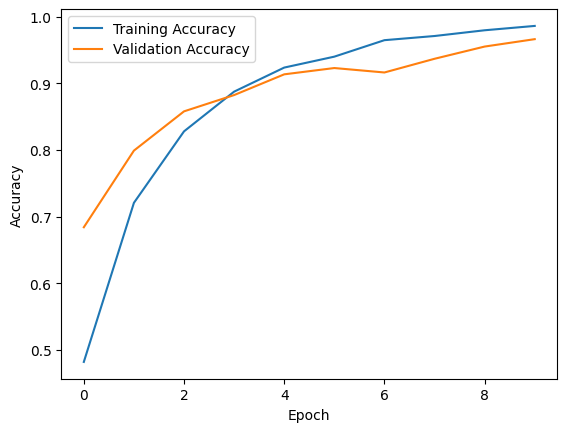

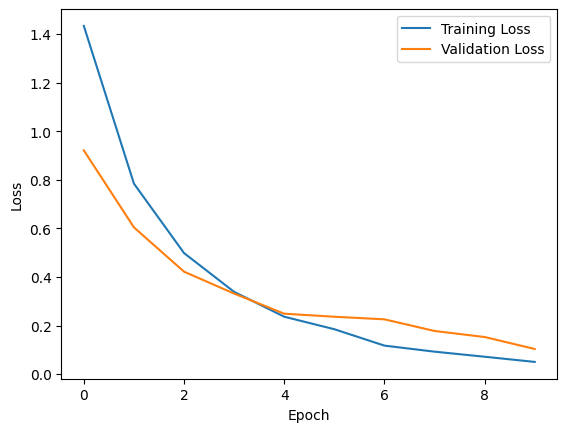

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()